<a href="https://colab.research.google.com/github/RifatMuhtasim/Deep_Learning/blob/main/Learn/7.Neural_Network_For_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [63]:
# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train length: ", len(X_train))
print("X_test lenght:", len(X_test))

X_train length:  60000
X_test lenght: 10000


Y Value: 9
X shape: (28, 28)


'X Value:'

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

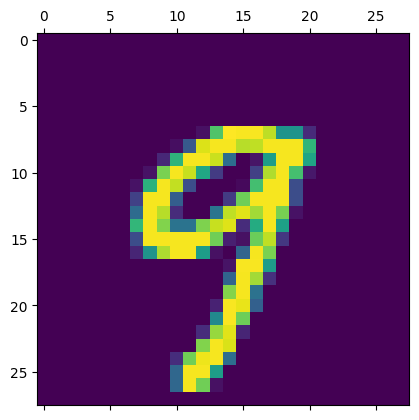

In [64]:
a = 45

print("Y Value:", y_train[a])
print("X shape:", X_train[a].shape)
display("X Value:", X_train[a][:10])
plt.matshow(X_train[a])

In [65]:
X_train = X_train /255
X_test = X_test / 255

In [66]:
X_train_flattend = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

X_train_flattend.shape

(60000, 784)

# Building Model <a id="model"></a>

In [67]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4660 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [68]:
# Evaluate this model

model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.9274


[0.2661457657814026, 0.9273999929428101]

## Predict

In [69]:
y_pred = model.predict(X_test_flattend)

313/313 [==============================] - 0s 1ms/step


Predicted value: 7


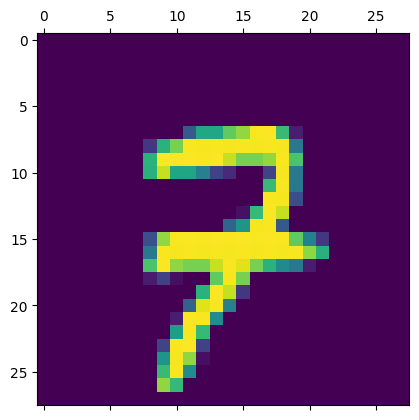

In [73]:
b = 144

print("Predicted value:", np.argmax(y_pred[b]))
plt.matshow(X_test[b])
plt.show()

In [75]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [76]:
# Confusion Matrix

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    5,   12,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  925,   17,    8,    4,   14,   10,   38,    4],
       [   1,    0,   18,  925,    0,   19,    4,   13,   24,    6],
       [   1,    1,    2,    1,  917,    0,   13,    5,   10,   32],
       [   7,    3,    2,   33,   10,  770,   21,    7,   33,    6],
       [   7,    3,    4,    1,    7,    7,  924,    2,    3,    0],
       [   1,    5,   22,    4,    7,    0,    0,  956,    3,   30],
       [   5,    9,    6,   18,    9,   23,   10,   13,  875,    6],
       [   9,    7,    1,    9,   30,    7,    1,   26,    8,  911]],
      dtype=int32)>

[]

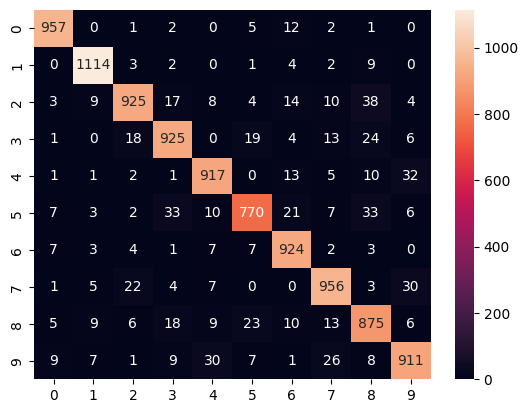

In [82]:
sns.heatmap(cm, annot=True, fmt="d")
plt.plot()

# Add Hidden Neural Layers

In [88]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation="relu"), # one added
    keras.layers.Dense(10, activation="sigmoid")
])

model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model2.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2650 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1223 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0866 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0529 - accuracy: 0.9845


In [89]:
# Evaluate this model

model2.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9793


[0.07064544409513474, 0.9793000221252441]

In [90]:
y_pred2 = model2.predict(X_test_flattend)

313/313 [==============================] - 1s 2ms/step


In [91]:
y_pred2_labels = [np.argmax(i) for i in y_pred2]

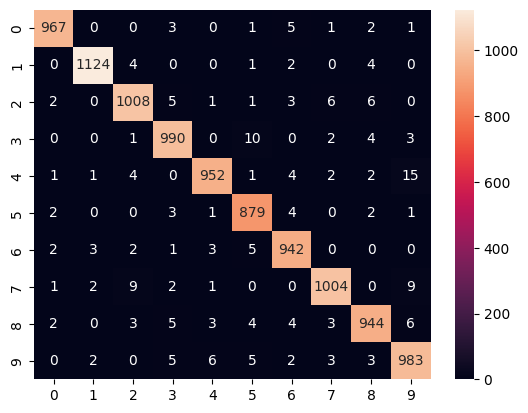

In [92]:
# Confusion Matrix

cm2 = tf.math.confusion_matrix(labels = y_test, predictions = y_pred2_labels)
sns.heatmap(cm2, annot=True, fmt="d")
plt.show()

# Without use X_train_flattend

In [95]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # For flattend variable
    keras.layers.Dense(100, activation="relu"), # one added
    keras.layers.Dense(10, activation="sigmoid")
])

model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2736 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1278 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9836
